# Store Sales - Time Series Forecasting

enlace='https://www.kaggle.com/code/max780228/store-sales-ls#2.-1%EC%B0%A8-EDA'


In [112]:
#iportamos librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

In [113]:
train='/content/drive/MyDrive/Finanzas/Forest casting/train.csv'
test='/content/drive/MyDrive/Finanzas/Forest casting/test.csv'
store='/content/drive/MyDrive/Finanzas/Forest casting/stores.csv'
sample_submission='/content/drive/MyDrive/Finanzas/Forest casting/sample_submission.csv'
oil='/content/drive/MyDrive/Finanzas/Forest casting/oil.csv'
holidays_events='/content/drive/MyDrive/Finanzas/Forest casting/holidays_events.csv'
Transactions='/content/drive/MyDrive/Finanzas/Forest casting/transactions.csv'

## **1. Lectura de datos y control (Data read & check)**

In [114]:
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')
store=pd.read_csv(store,sep=',')
sample_submission=pd.read_csv(sample_submission,sep=',')
oil=pd.read_csv(oil,sep=',')
holidays_events=pd.read_csv(holidays_events,sep=',')
Transactions=pd.read_csv(Transactions,sep=',')

**1. Analisamos la data train y test**

In [115]:
train=pd.DataFrame(train)
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [116]:
test=pd.DataFrame(test)
test.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

**El problema coinsiste en resalizar un forestcasting o modelos de series de tiempo con el objetivo de predecir ventas en el data test.**

In [117]:
print("Numero de filas y columnas del train es :", train.shape,end='\n')
print("Numero de filas y columnas del test es:", test.shape,end='\n')

Numero de filas y columnas del train es : (3000888, 6)
Numero de filas y columnas del test es: (28512, 5)


In [118]:
print(train.info())
print('---------------------------------------')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None


In [119]:
if train.isnull().sum().sum()==0 or test.isnull().sum().sum()==0:
  print('No existen valores nulos')
else:
  print('Si existe valores nulos')

No existen valores nulos


In [120]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [121]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [122]:
#store_nbr identifies the store at which the products are sold
train['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [123]:
test['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [124]:
print(train['family'].unique())
print(len(train['family'].unique()),end='\n')

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
33


In [125]:
train['date']=pd.to_datetime(train['date'],format="%Y/%m/%d")
test['date']=pd.to_datetime(test['date'],format="%Y/%m/%d")

**1. Analisamos la data Sample Submission**

In [126]:
sample_submission=pd.DataFrame(sample_submission)
sample_submission.head()

id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0

In [127]:
#28512 filas y 2 columnas
sample_submission.shape

(28512, 2)

In [128]:
#analizemos si existen nulos
sample_submission.isnull().sum()

id       0
sales    0
dtype: int64

In [129]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


**1. Analisamos la data oil**

In [130]:
oil=pd.DataFrame(oil)
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [131]:
oil.shape

(1218, 2)

**Precio diario del petróleo.** 

Incluye valores durante los marcos de tiempo de los datos del tren y de la prueba. (Ecuador es un país dependiente del petróleo y su salud económica es muy vulnerable a los impactos en los precios del petróleo)

In [132]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [133]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

**1. Analisamos la data Holidays Events**

In [134]:
holidays_events=pd.DataFrame(holidays_events)
holidays_events.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [135]:
#350 filas y 6 columnas
holidays_events.shape

(350, 6)

In [136]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

**1. Analisamos la data store**

In [137]:
store=pd.DataFrame(store)
store.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [138]:
store.shape

(54, 5)

In [139]:
store.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [140]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


**1. Analisamos la data Transactions**

In [141]:
transactions=pd.DataFrame(Transactions)
transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [142]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [143]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [144]:
transactions.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

In [145]:
transactions['date']=pd.to_datetime(transactions['date'],format="%Y/%m/%d")

In [146]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


# Analisis y lectura de datos (EDA)

## **EDA TRAIN Y SALES**

In [147]:
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [148]:
sales_df=train.groupby('date')[['sales']].sum().reset_index()
sales_df["datetime"] = pd.to_datetime(sales_df["date"])

In [149]:
sales_df.head()

date          sales   datetime
0 2013-01-01    2511.618999 2013-01-01
1 2013-01-02  496092.417944 2013-01-02
2 2013-01-03  361461.231124 2013-01-03
3 2013-01-04  354459.677093 2013-01-04
4 2013-01-05  477350.121229 2013-01-05

In [150]:
sales_df.set_index('datetime',inplace=True)
sales_df.head()

date          sales
datetime                            
2013-01-01 2013-01-01    2511.618999
2013-01-02 2013-01-02  496092.417944
2013-01-03 2013-01-03  361461.231124
2013-01-04 2013-01-04  354459.677093
2013-01-05 2013-01-05  477350.121229

In [151]:
#Graficar de linea de ventas
import plotly.express as px
fig=px.line(sales_df,x=sales_df.index,y='sales',title='Grafica Lineal de ventas',template='plotly_dark')
fig.show()

In [152]:
fig=px.histogram(sales_df,x='sales',title='Histograma de Ventas',template='plotly_dark',nbins=100,opacity=0.5,color_discrete_sequence=['indianred'])
fig.show()

* Cuando el coeficiente de autocorrelación es cercano a 1, significa que las observaciones están altamente correlacionadas. 

* Cuando es cercano a -1, significa que las observaciones están inversamente correlacionadas. 

* Cuando es cercano a 0, significa que no hay correlación entre las observaciones.

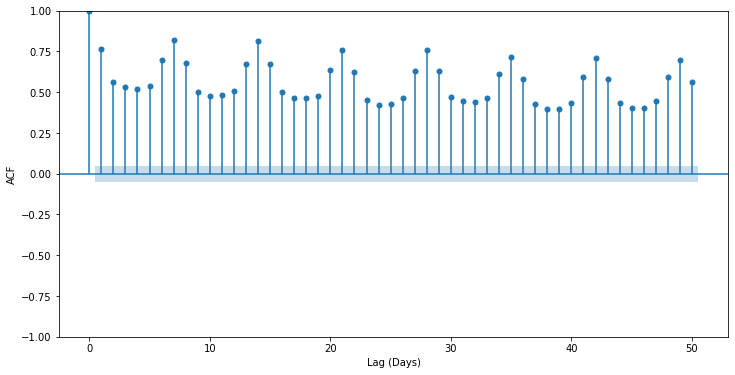

In [153]:
# import the plotting functions for act and pacf  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(sales_df["sales"], lags=50, title=None, bartlett_confint=False,ax=ax)
plt.ylabel("ACF")
plt.xlabel("Lag (Days)")
plt.show()

* La tendencia representa la dirección general en la que la serie de tiempo está cambiando. En otras palabras, la tendencia es la evolución de la serie a largo plazo. La tendencia puede ser creciente, decreciente o mantenerse constante.

* La estacionalidad se refiere a patrones repetitivos o periódicos en la serie de tiempo que se producen en intervalos regulares. Por ejemplo, las ventas de un producto pueden aumentar durante la temporada navideña cada año. La estacionalidad puede ser anual, trimestral, mensual, semanal o diaria, dependiendo de la naturaleza de los datos.

* Los residuos son las fluctuaciones aleatorias o no explicadas por la tendencia y la estacionalidad. Los residuos son la variación de la serie de tiempo que no puede ser explicada por la tendencia o la estacionalidad, y se consideran el componente "irregular" de la serie de tiempo

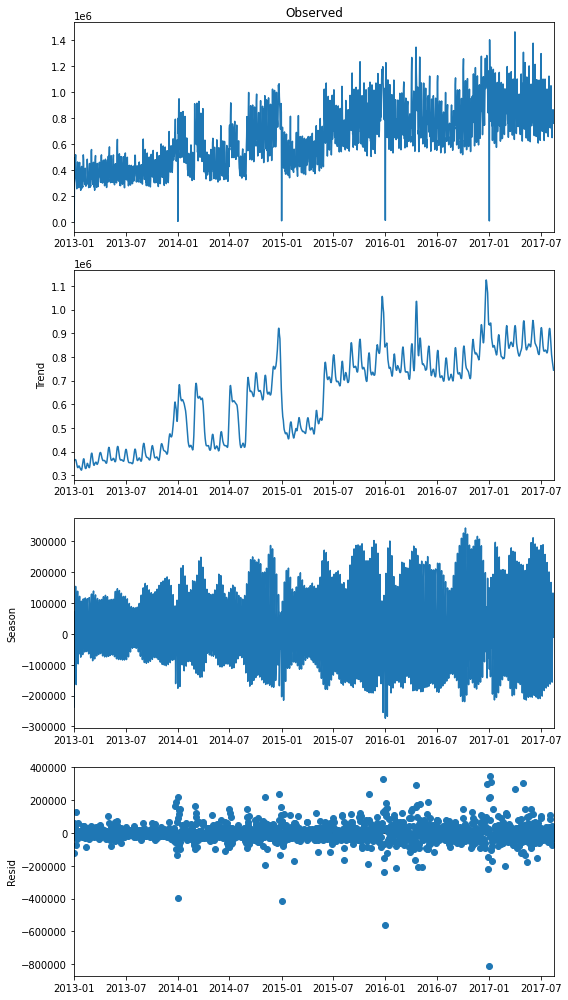

In [154]:
from statsmodels.tsa.seasonal import STL
import matplotlib as mpl
stl_model = STL(sales_df[["sales"]], period=7, seasonal=7).fit()
with mpl.rc_context():
    mpl.rc("figure", figsize=(8, 14))
    stl_model.plot()
    plt.tight_layout()

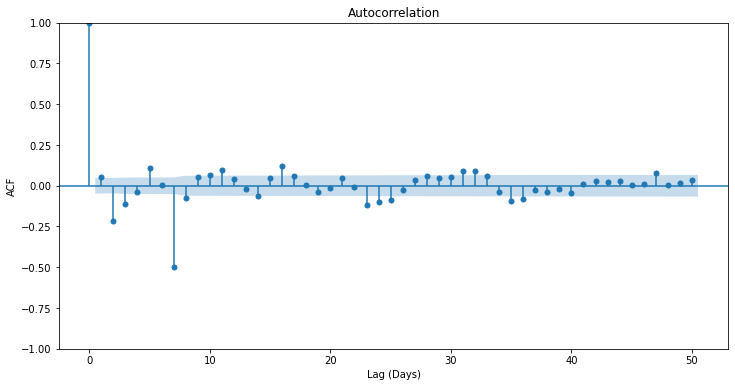

In [155]:
# Residual
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(stl_model.resid.dropna(), lags=50,ax=ax)
plt.ylabel("ACF")
plt.xlabel("Lag (Days)");
plt.show()

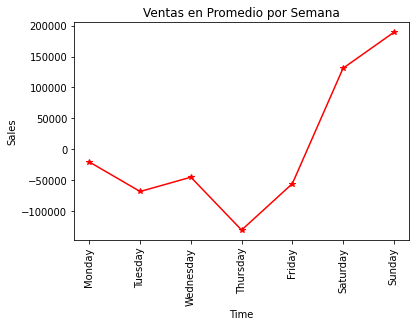

In [156]:
#Segun el grafico se presenta mayor ventas en promedio  los domingos y menor ventas en promedio los dias jueves
seasonal = stl_model.seasonal.groupby(stl_model.seasonal.index.day_of_week).mean()
seasonal.plot.line(xlabel="Time", ylabel="Sales", marker="*",color='red',title='Ventas en Promedio por Semana')
plt.xticks(range(0, 7), calendar.day_name[0:], rotation="vertical")
plt.show();

**Seasonality por Semana**

In [157]:
print("EL promedio de ventas es",sales_df.mean())

EL promedio de ventas es sales    637556.384919
dtype: float64


<ipython-input-157-fba3f7c83972>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [158]:
#Vamos analizar la venta cada 7 dias
sales_7D_df = sales_df.resample('7D').mean()
sales_7D_df.head()

sales
datetime                 
2013-01-01  363956.181220
2013-01-08  332977.628174
2013-01-15  340838.619132
2013-01-22  320916.224872
2013-01-29  362248.459470

In [159]:
fig=px.line(sales_7D_df,x=sales_7D_df.index,y='sales',title='el promedio de ventas por Semana',template='plotly_dark')
fig.show()

In [160]:
fig = px.bar(sales_7D_df, x=sales_7D_df.index, y="sales",template='plotly_dark')
fig.show()

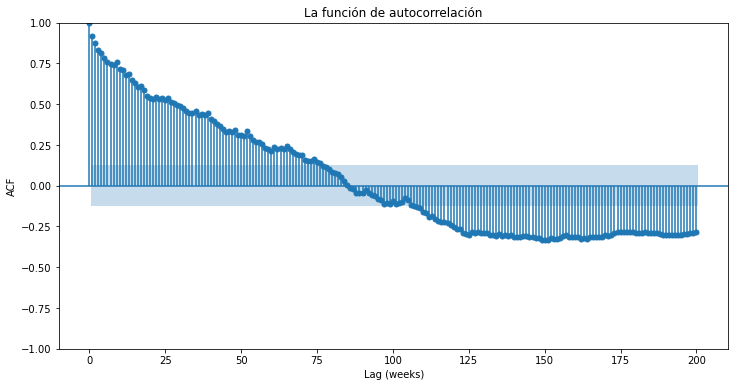

In [161]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(sales_7D_df["sales"], lags=200, title=None, bartlett_confint=False,ax=ax)
plt.title('La función de autocorrelación')
plt.ylabel("ACF")
plt.xlabel("Lag (weeks)")
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



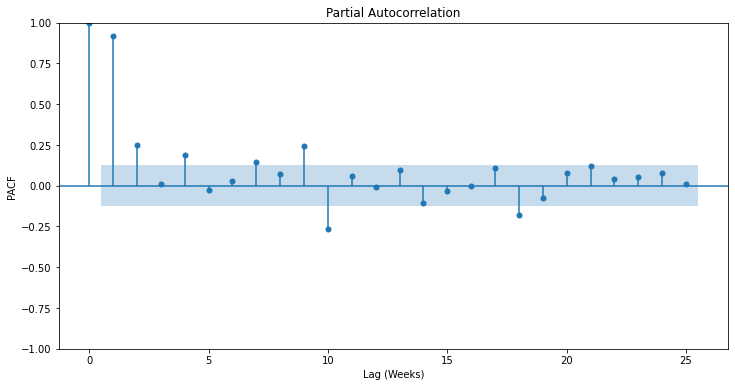

In [162]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(sales_7D_df["sales"],lags=25,ax=ax)
plt.ylabel("PACF")
plt.xlabel("Lag (Weeks)")
plt.show()

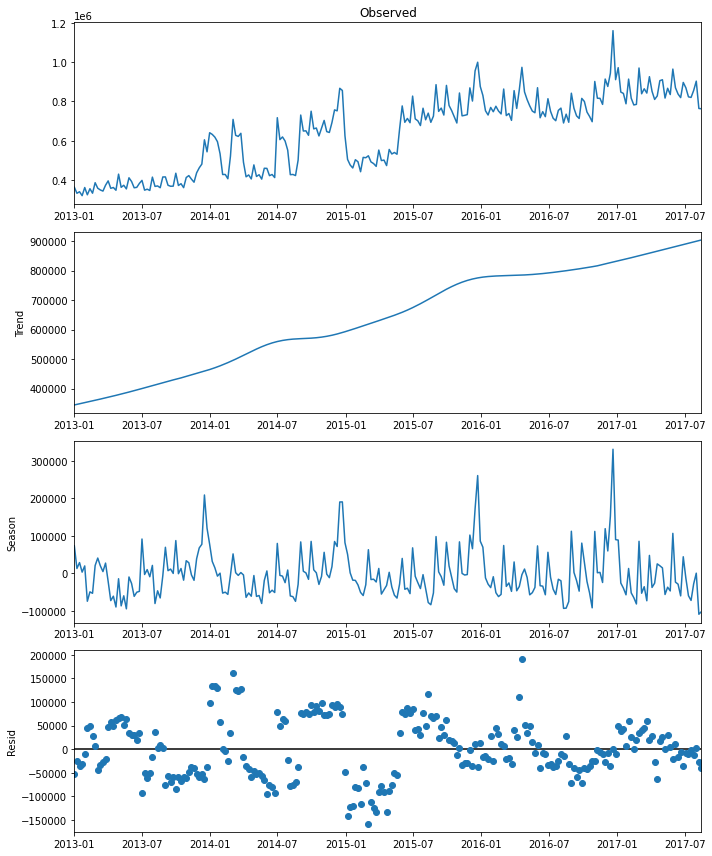

In [163]:
# Periodo de 52  semanas
# Estacional 53 semanas
stl_model = STL(sales_7D_df[["sales"]], period=52, seasonal=53).fit()
with mpl.rc_context():
    mpl.rc("figure", figsize=(10, 12))
    stl_model.plot()
    plt.tight_layout()

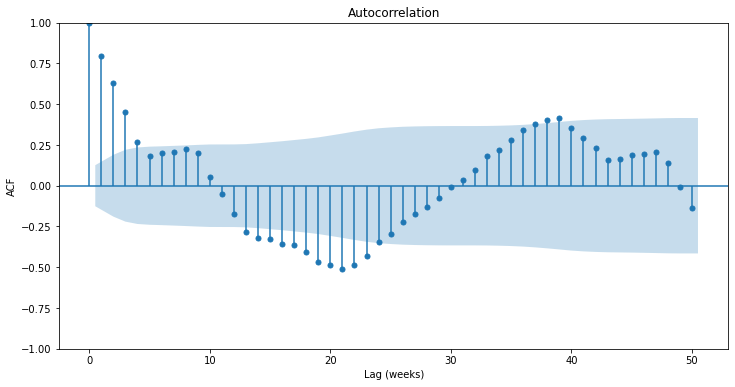

In [164]:
#Resiudal
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(stl_model.resid.dropna(), lags=50, ax=ax)
ax.set_ylabel("ACF")
ax.set_xlabel("Lag (weeks)")
plt.show()

<ipython-input-165-16be6c82b515>:2: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



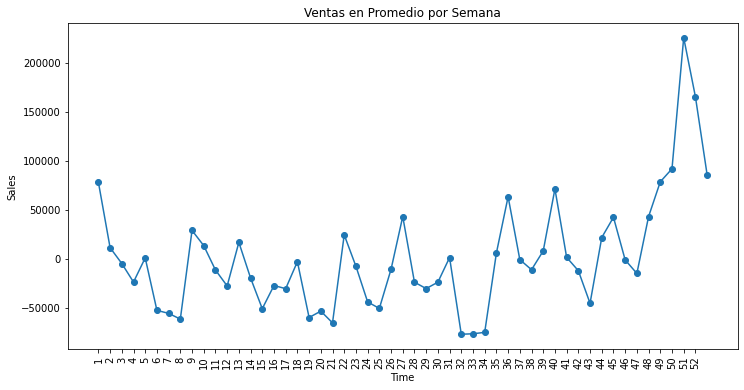

In [165]:
fig, ax = plt.subplots(figsize=(12, 6))
seasonal = stl_model.seasonal.groupby(stl_model.seasonal.index.week).mean()
seasonal.plot.line(xlabel="Time", ylabel="Sales", marker="o",ax=ax)
plt.title('Ventas en Promedio por Semana')
plt.xticks(range(1, 53), rotation=90)
plt.show();

**Seasonality 1 Mes**

In [166]:
#Promedio de ventas durante el mes
sales_1M_df = sales_7D_df.resample('1M').mean()
print("El promedio de ventas durante el mes :",sales_1M_df.mean().round(2))

El promedio de ventas durante el mes : sales    638128.01
dtype: float64


In [167]:
fig=px.line(sales_1M_df,x=sales_1M_df.index,y='sales',title='Venta en Promedio por Mes',template='plotly_dark')
fig.show()

In [168]:
fig = px.bar(sales_1M_df, x=sales_1M_df.index, y="sales",template='plotly_dark',title='Venta en Promedio por Mes')
fig.show()

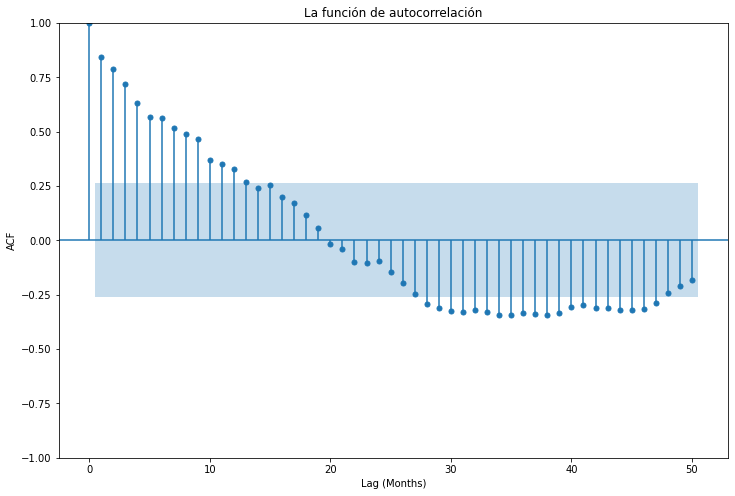

In [169]:
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(sales_1M_df["sales"], lags=50,bartlett_confint=False,title=None,ax=ax)
plt.title('La función de autocorrelación')
plt.ylabel("ACF")
plt.xlabel("Lag (Months)")
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



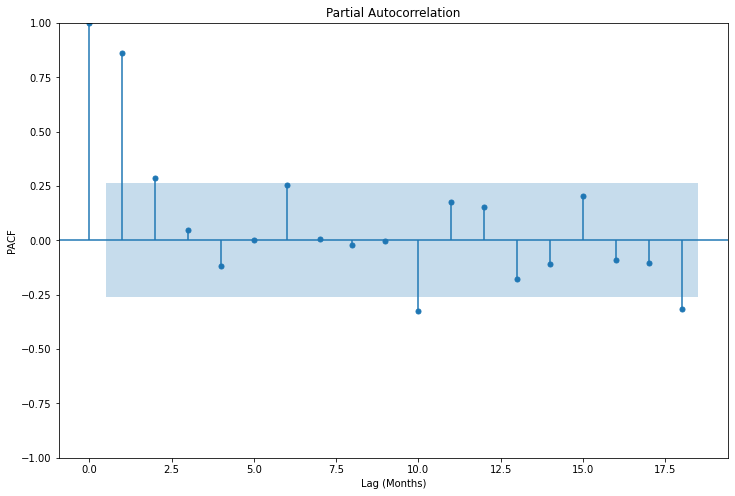

In [170]:
fig,ax=plt.subplots(figsize=(12,8))
plot_pacf(sales_1M_df["sales"],ax=ax)
plt.ylabel("PACF")
plt.xlabel("Lag (Months)")
plt.show()

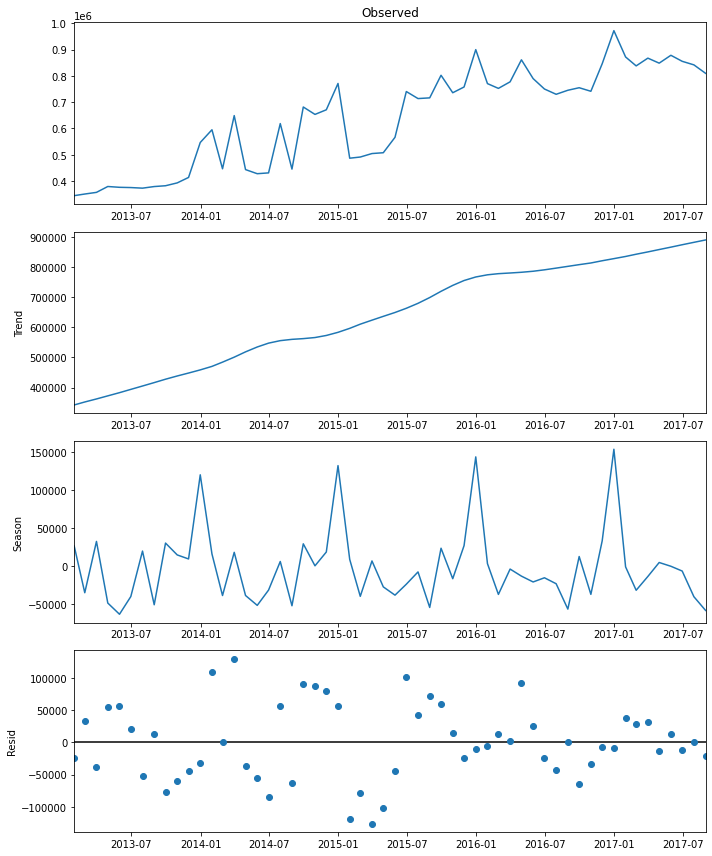

In [171]:
#Periodos 12 meses
stl_model = STL(sales_1M_df[["sales"]], period=12, seasonal=13).fit()
with mpl.rc_context():
    mpl.rc("figure", figsize=(10, 12))
    stl_model.plot()
    plt.tight_layout()

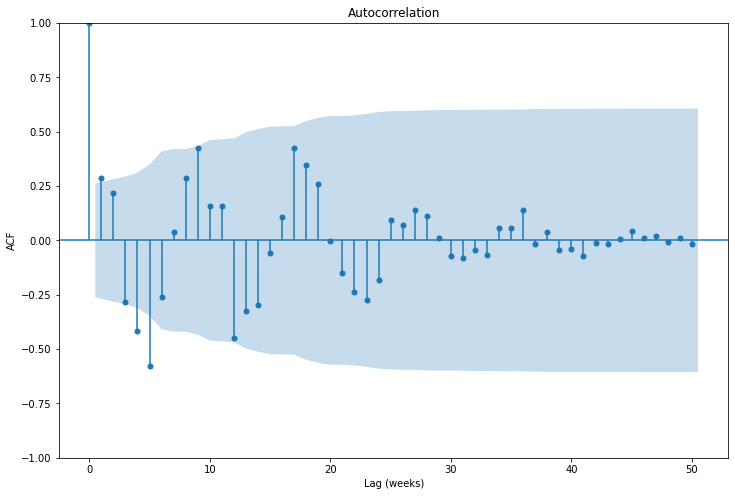

In [172]:
#residuos
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(stl_model.resid.dropna(), lags=50,ax=ax)
plt.ylabel("ACF")
plt.xlabel("Lag (weeks)")
plt.show()

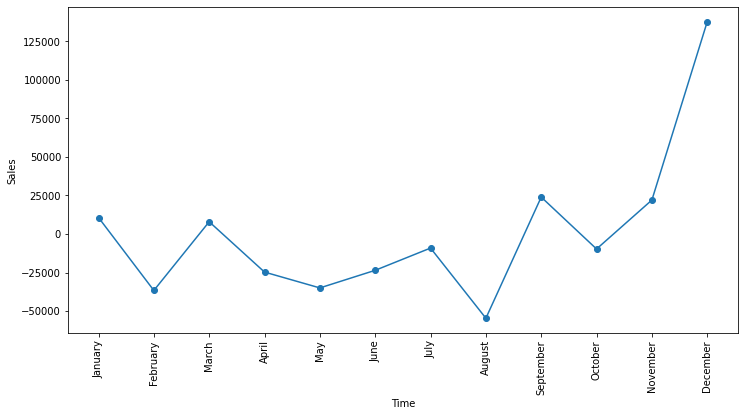

In [173]:
#Segun el grafico existen ventas negativas.
plt.figure(figsize=(12, 6))
seasonal = stl_model.seasonal.groupby(stl_model.seasonal.index.month).mean()
seasonal.plot.line(xlabel="Time", ylabel="Sales", marker="o")
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=90)
plt.show();

## **Transactions**

In [174]:
Transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [175]:
fig=px.line(Transactions,x='date',y='transactions',color='store_nbr',title='Numero de Transactiones de la tienda',template='plotly_dark')
fig.show()

In [176]:
transactions_sum_df = Transactions.groupby("date").sum()[["transactions"]].reset_index() 
transactions_sum_df["datetime"] = pd.to_datetime(transactions_sum_df["date"])
transactions_sum_df.set_index("datetime", inplace=True)

In [177]:
transactions_sum_df.head()

date  transactions
datetime                           
2013-01-01 2013-01-01           770
2013-01-02 2013-01-02         93215
2013-01-03 2013-01-03         78504
2013-01-04 2013-01-04         78494
2013-01-05 2013-01-05         93573

In [178]:
fig=px.line(transactions_sum_df,x=transactions_sum_df.index,y='transactions',title='Numero de Suma de las Transaciones',template='plotly_dark')
fig.show()

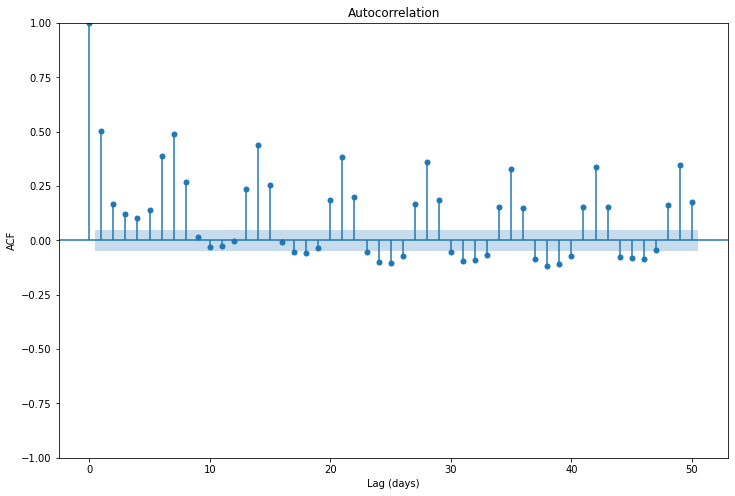

In [179]:
#Grafico de Autocorrelacion
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(transactions_sum_df["transactions"], lags=50,bartlett_confint=False,ax=ax)
plt.ylabel("ACF")
plt.xlabel("Lag (days)")
plt.show()

**Transactions por Semana**

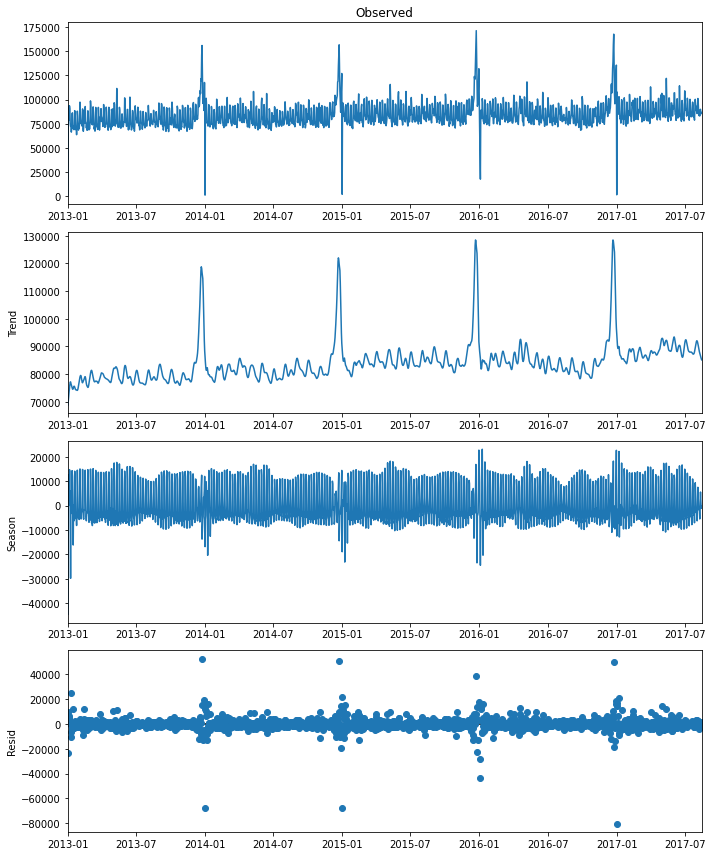

In [180]:
#Periodo de 7 dias
stl_model = STL(transactions_sum_df[["transactions"]], period=7, seasonal=7).fit()
with mpl.rc_context():
    mpl.rc("figure", figsize=(10, 12))
    stl_model.plot()
    plt.tight_layout()

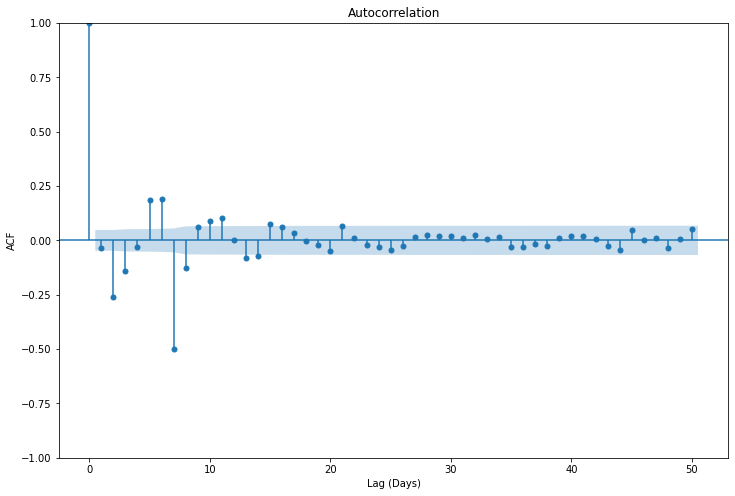

In [181]:
#Residuos
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(stl_model.resid.dropna(),lags=50, ax=ax)
plt.ylabel("ACF")
plt.xlabel("Lag (Days)")
plt.show()

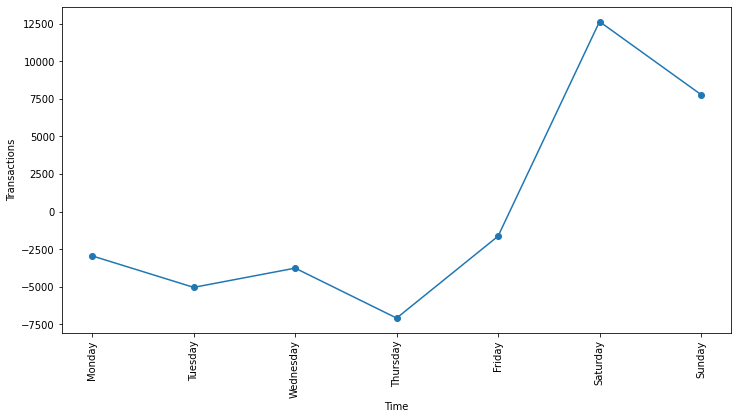

In [182]:
#el dia sabado es donde se realiza mas ventas en promedio en total
#el dia jueves es donde se realiza menos ventas en promedio en total
plt.figure(figsize=(12, 6))
seasonal = stl_model.seasonal.groupby(stl_model.seasonal.index.day_of_week).mean()
seasonal.plot.line(xlabel="Time", ylabel="Transactions", marker="o")
plt.xticks(range(0, 7), calendar.day_name[0:], rotation="vertical")
plt.show()

In [183]:
transactions_7D_sum_df = transactions_sum_df.resample('7D').mean()

In [184]:
transactions_7D_sum_df.head()

transactions
datetime                
2013-01-01  72945.285714
2013-01-08  74701.714286
2013-01-15  75848.285714
2013-01-22  73642.857143
2013-01-29  78228.000000

In [185]:
fig=px.line(transactions_7D_sum_df,x=transactions_7D_sum_df.index,y='transactions',title='Promedio de transaciones por semana',template='plotly_dark')
fig.show()

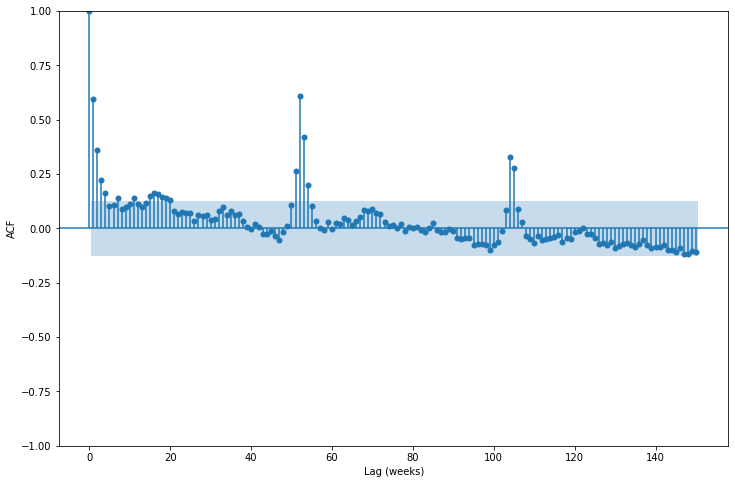

In [186]:
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(transactions_7D_sum_df["transactions"], lags=150, title=None, bartlett_confint=False,ax=ax)
plt.ylabel("ACF")
plt.xlabel("Lag (weeks)")
plt.show()

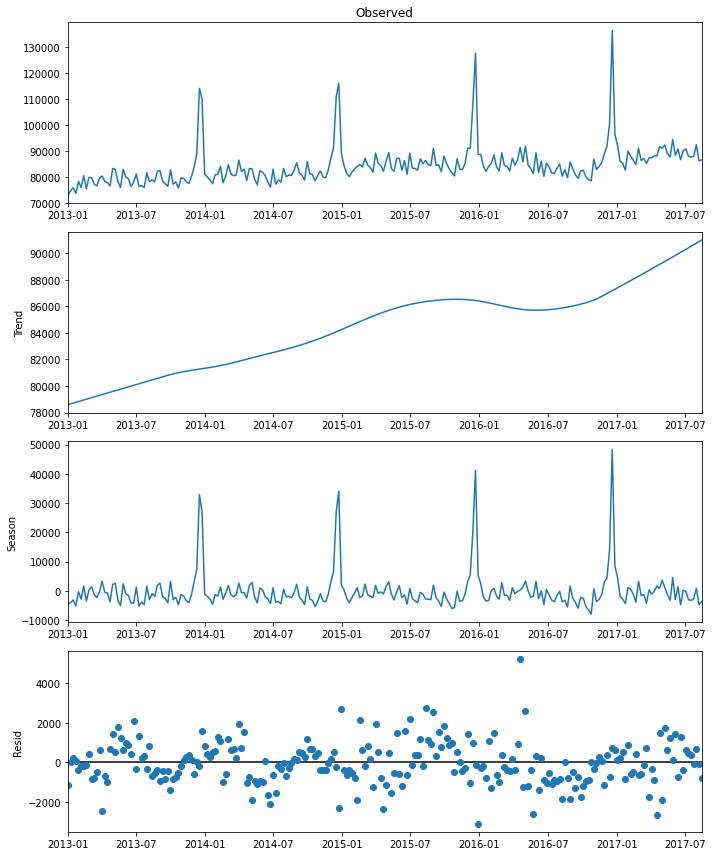

In [187]:
#Periodo de 52 semanas
stl_model=STL(transactions_7D_sum_df[['transactions']],period=52,seasonal=53).fit()
with mpl.rc_context():
  mpl.rc('figure',figsize=(10,12))
  stl_model.plot()
  plt.tight_layout()

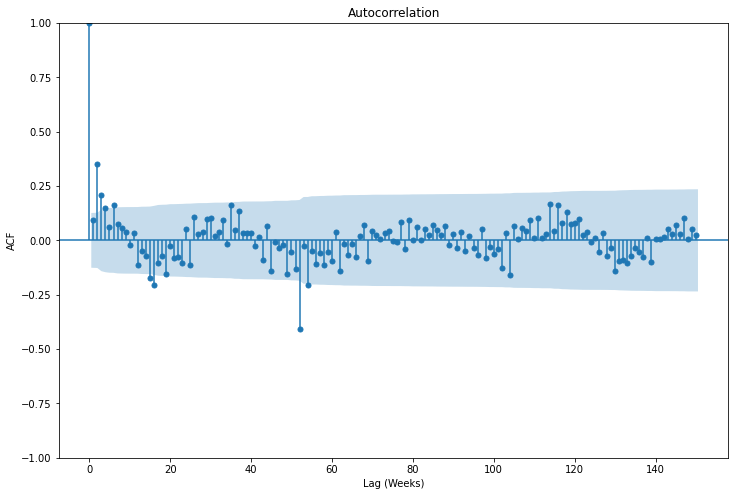

In [188]:
#RESIDUOS
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(stl_model.resid.dropna(),lags=150,ax=ax)
plt.ylabel('ACF')
plt.xlabel('Lag (Weeks)')
plt.show()

<ipython-input-189-2856238c3656>:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



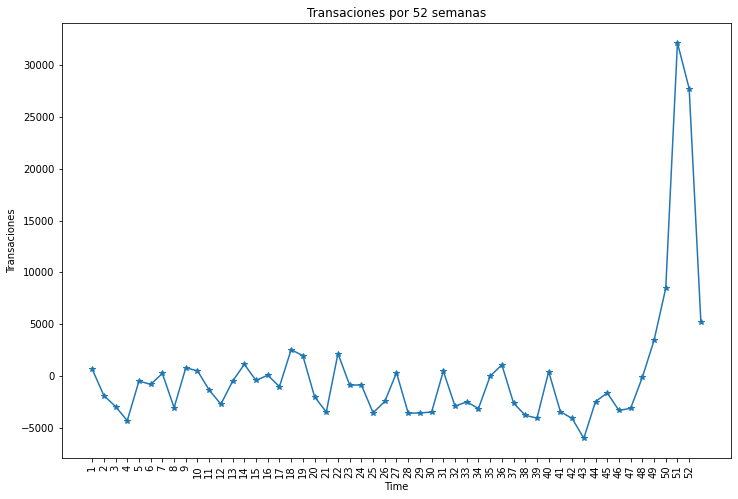

In [189]:
#Segun la grafica se muestra una tendencia a la alza en la semana 48 a la 51
#De la 51 a 52 la tendecia es en caida con respecto a las transaciones
fig,ax=plt.subplots(figsize=(12,8))
seasonal = stl_model.seasonal.groupby(stl_model.seasonal.index.week).mean()
seasonal.plot.line(xlabel='Time',ylabel='Transaciones',marker='*',title='Transaciones por 52 semanas')
plt.xticks(range(1,53),rotation=90)
plt.show()

**Transaciones por Mes**

In [190]:
transactions_1M_sum_df=transactions_7D_sum_df.resample('1M').mean()
transactions_1M_sum_df.head()

transactions
datetime                
2013-01-31  75073.228571
2013-02-28  77912.285714
2013-03-31  78229.535714
2013-04-30  79210.942857
2013-05-31  79954.107143

In [191]:
fig=px.line(transactions_1M_sum_df,x=transactions_1M_sum_df.index,y='transactions',title='Promedio de Transaciones por Mes',template='plotly_dark')
fig.show()

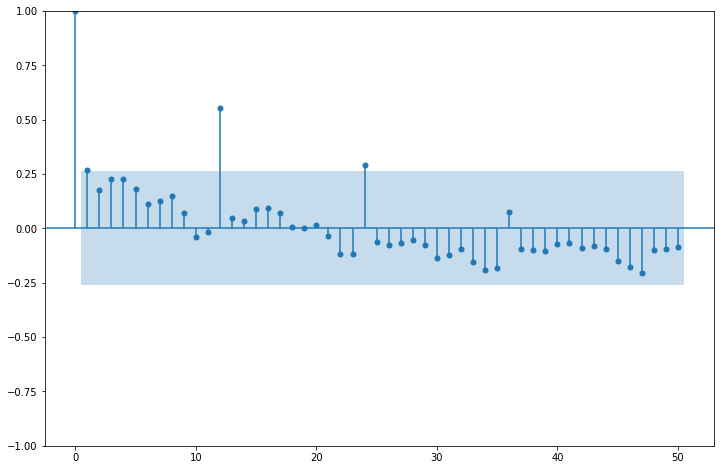

In [192]:
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(transactions_1M_sum_df['transactions'],lags=50,title=None,bartlett_confint=False,ax=ax)
plt.show()

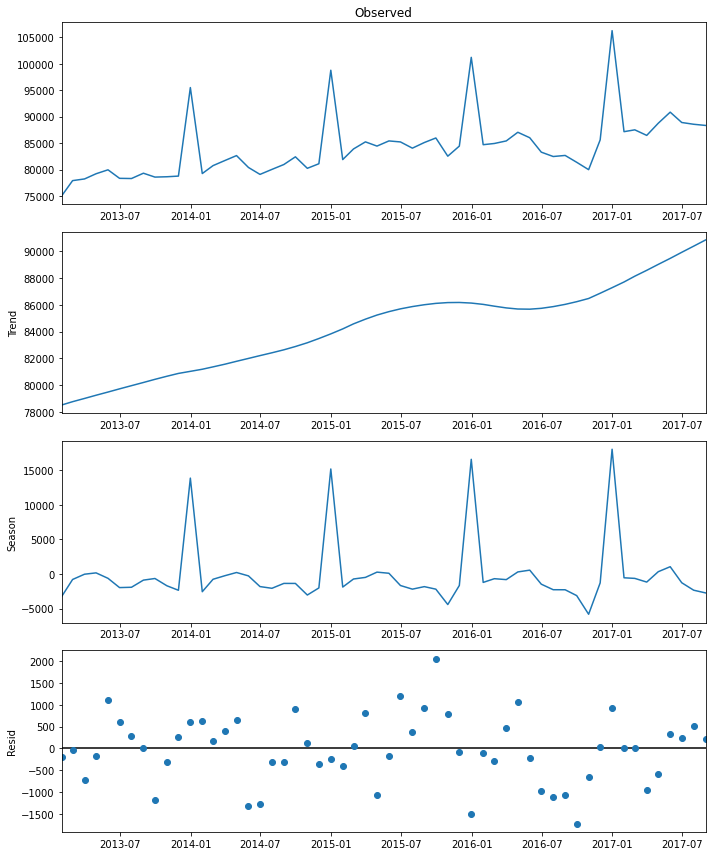

In [193]:
#el periodo es cada 12 meses
stl_model = STL(transactions_1M_sum_df[["transactions"]], period=12, seasonal=13).fit()
with mpl.rc_context():
    mpl.rc("figure", figsize=(10, 12))
    stl_model.plot()
    plt.tight_layout()

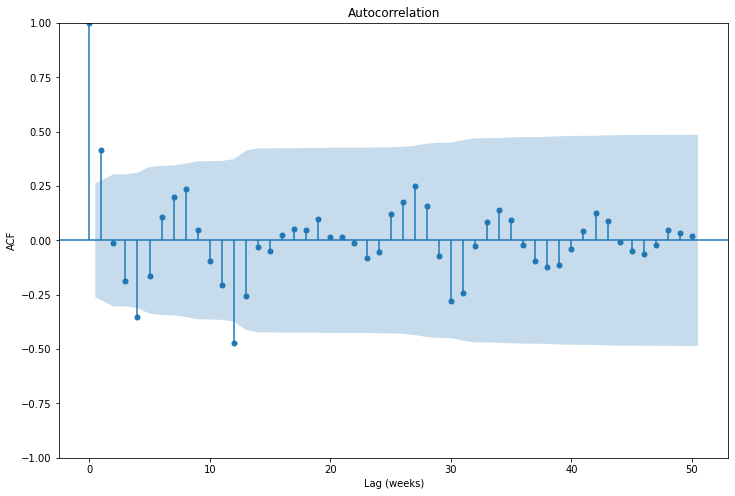

In [194]:
#Residuos
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(stl_model.resid.dropna(),lags=50,ax=ax)
plt.ylabel('ACF')
plt.xlabel('Lag (weeks)')
plt.show()


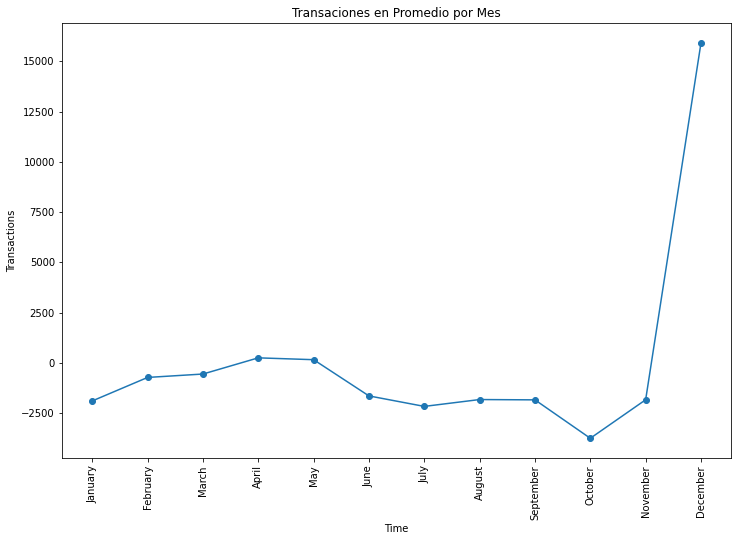

In [195]:
#la mayor transaciones se realiza en el mes de Diciembre, esto se debe a las fiestas como la navidad
#la menor transaciones se realizan octubre
plt.figure(figsize=(12, 8))
seasonal = stl_model.seasonal.groupby(stl_model.seasonal.index.month).mean()
seasonal.plot.line(xlabel="Time", ylabel="Transactions", marker="o",title='Transaciones en Promedio por Mes')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=90)
plt.show()

**Transaction vs Sales**

In [196]:
#Transaciones vs Ventas
print('***************')
print(Transactions.shape)
print(Transactions.columns)
print('***************')
print(sales_df.shape)
print(sales_df.columns)
print('***************')
#como se evidencia exite un relacion con la columna date

***************
(83488, 3)
Index(['date', 'store_nbr', 'transactions'], dtype='object')
***************
(1684, 2)
Index(['date', 'sales'], dtype='object')
***************


In [197]:
#Relacion con la columna Date de tipo left join con la tabla transactions y sales_df
sales_df.reset_index(inplace=True)
transaction_vs_sales = pd.merge(Transactions, sales_df, how="left", on="date")
transaction_vs_sales.head()

date  store_nbr  transactions   datetime          sales
0 2013-01-01         25           770 2013-01-01    2511.618999
1 2013-01-02          1          2111 2013-01-02  496092.417944
2 2013-01-02          2          2358 2013-01-02  496092.417944
3 2013-01-02          3          3487 2013-01-02  496092.417944
4 2013-01-02          4          1922 2013-01-02  496092.417944

In [198]:
fig=px.scatter(transaction_vs_sales,x=transaction_vs_sales['transactions'],y=transaction_vs_sales['sales'],title='Transaciones vs Ventas',template='plotly_dark')
fig.show()

**Analizar la data OIL**

In [199]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [200]:
#Entre el 2016 y 2017, el precio del aceite es bajo.
fig=px.line(oil,x='date',y='dcoilwtico',title='Precio OIL',template='plotly_dark')
fig.show()

In [201]:
# Polynomial Imputation 
imputed_oil_df = oil.interpolate(method="polynomial", order=2)

In [202]:
imputed_oil_df.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

En este caso, el parámetro method="bfill" indica que se utilizará un método de propagación hacia atrás ("backward fill") para reemplazar los valores nulos con los valores de la fila siguiente en la misma columna.

In [203]:
imputed_oil_df.fillna(method="bfill", inplace=True)

In [204]:
#De esta forma completamos el precio de las fechas faltantes
fig=px.line(imputed_oil_df,x='date',y='dcoilwtico',title='Precio del Oil (Despues de la imputacion)',template='plotly_dark')
fig.show()

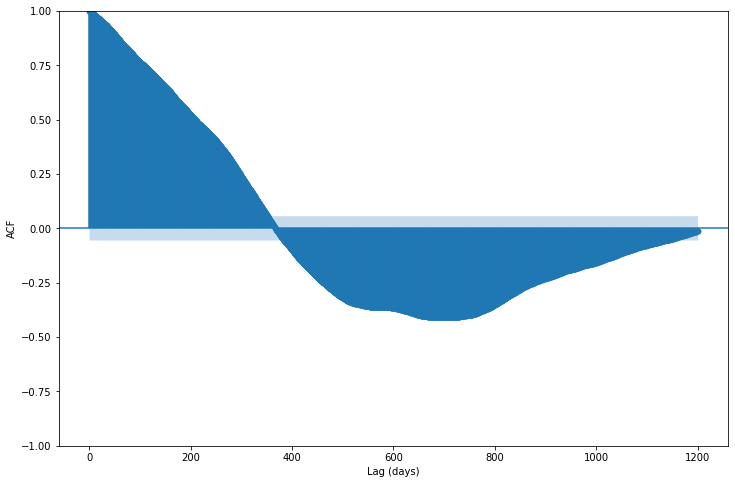

In [205]:
#Auto Correlacion
fig,ax=plt.subplots(figsize=(12,8))
plot_acf(imputed_oil_df['dcoilwtico'],lags=1200,title=None,bartlett_confint=False,ax=ax)
plt.ylabel('ACF')
plt.xlabel('Lag (days)')
plt.show()

In [206]:
imputed_oil_df.head()

date  dcoilwtico
0  2013-01-01       93.14
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

**Precio del aceite vs ventas**

In [207]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [208]:
sales_df.head()

datetime       date          sales
0 2013-01-01 2013-01-01    2511.618999
1 2013-01-02 2013-01-02  496092.417944
2 2013-01-03 2013-01-03  361461.231124
3 2013-01-04 2013-01-04  354459.677093
4 2013-01-05 2013-01-05  477350.121229

In [214]:
oil['date']=pd.to_datetime(oil['date'],format="%Y/%m/%d")

In [215]:
oil_vs_sales = pd.merge(oil, sales_df, how="left", on="date")
oil_vs_sales.head()

date  dcoilwtico   datetime          sales
0 2013-01-01         NaN 2013-01-01    2511.618999
1 2013-01-02       93.14 2013-01-02  496092.417944
2 2013-01-03       92.97 2013-01-03  361461.231124
3 2013-01-04       93.12 2013-01-04  354459.677093
4 2013-01-07       93.20 2013-01-07  336122.801066

In [217]:
fig=px.scatter(oil_vs_sales,x=oil_vs_sales['dcoilwtico'],y=oil_vs_sales['sales'],title='Ventas vs Aceite',template='plotly_dark')
fig.show()

**Store**

In [218]:
store.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [219]:
store['city'].value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [223]:
store['state'].value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

**Hollydays events**

In [230]:
holidays_events.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [231]:
holidays_events['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [232]:
#Transfered con valor True is false
real_holidays = holidays_events.query("transferred != True and type != 'Work Day'")
real_holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [233]:
real_holidays.tail()

date        type    locale locale_name description  transferred
345  2017-12-22  Additional  National     Ecuador   Navidad-3        False
346  2017-12-23  Additional  National     Ecuador   Navidad-2        False
347  2017-12-24  Additional  National     Ecuador   Navidad-1        False
348  2017-12-25     Holiday  National     Ecuador     Navidad        False
349  2017-12-26  Additional  National     Ecuador   Navidad+1        False

In [234]:
real_holidays['transferred'].value_counts()

False    333
Name: transferred, dtype: int64

In [237]:
real_holidays = real_holidays.assign(holidays = 1)[["date", "holidays"]]
real_holidays.drop_duplicates(inplace=True)

In [238]:
real_holidays.head()

date  holidays
0  2012-03-02         1
1  2012-04-01         1
2  2012-04-12         1
3  2012-04-14         1
4  2012-04-21         1

In [242]:
fig=px.scatter(real_holidays,x=real_holidays['date'],y=real_holidays['holidays'],title='Holidays',template='plotly_dark')
fig.show()